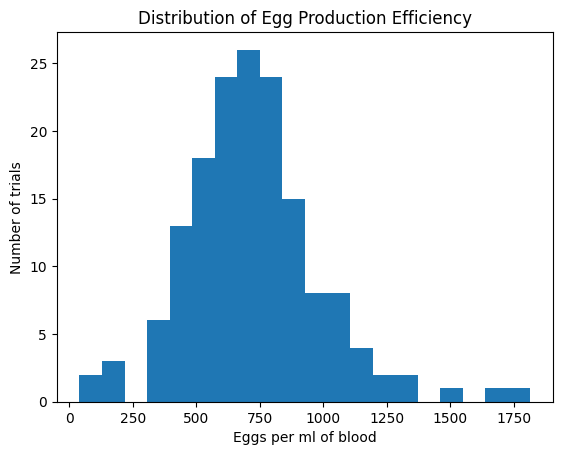

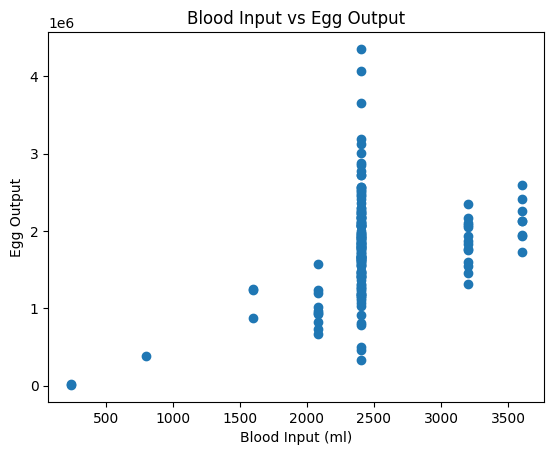

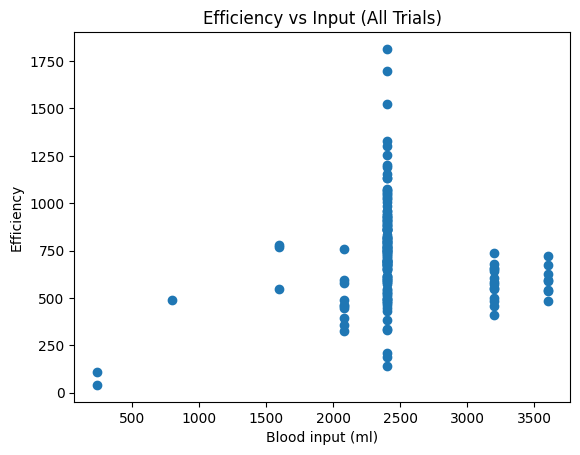

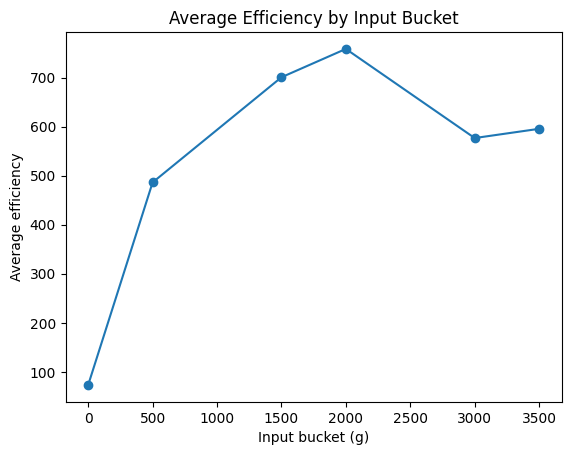

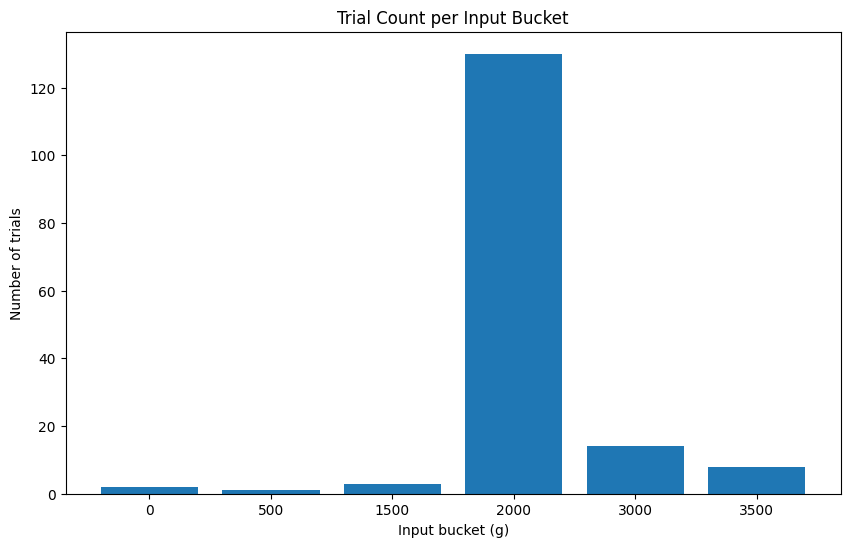

(6, 3)


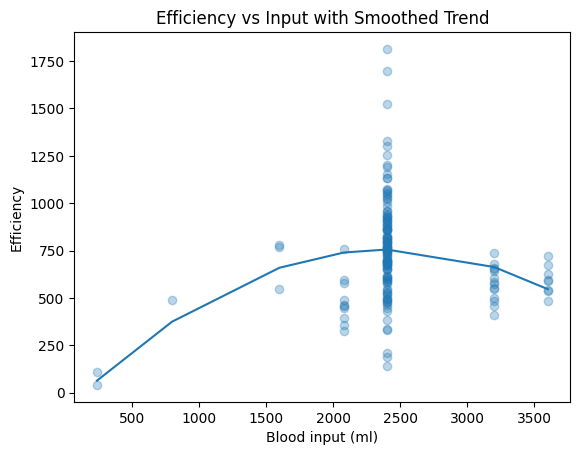

In [27]:
import pandas as pd

df = pd.read_csv("../data/processed/bf_efficiency_clean.csv")
df.head()

df.describe()

import matplotlib.pyplot as plt

plt.hist(df["efficiency"], bins=20)
plt.xlabel("Eggs per ml of blood")
plt.ylabel("Number of trials")
plt.title("Distribution of Egg Production Efficiency")
plt.show()

plt.scatter(df["blood_input_ml"], df["egg_output_total"])
plt.xlabel("Blood Input (ml)")
plt.ylabel("Egg Output")
plt.title("Blood Input vs Egg Output")
plt.show()

df.groupby("line_id")["efficiency"].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["blood_input_ml"], df["efficiency"])
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Input (All Trials)")
plt.show()

import os
os.makedirs("../reports/figures", exist_ok=True)


bucket_df = (
    df.assign(input_bucket=(df["blood_input_ml"] // 500) * 500)
      .groupby("input_bucket")
      .agg(
          avg_efficiency=("efficiency", "mean"),
          n_trials=("efficiency", "count")
      )
      .reset_index()
)

plt.figure()
plt.plot(bucket_df["input_bucket"], bucket_df["avg_efficiency"], marker="o")
plt.xlabel("Input bucket (g)")
plt.ylabel("Average efficiency")
plt.title("Average Efficiency by Input Bucket")
plt.savefig("../reports/figures/efficiency_by_bucket.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(
    bucket_df["input_bucket"].astype(str),
    bucket_df["n_trials"]
)
plt.xlabel("Input bucket (g)")
plt.ylabel("Number of trials")
plt.title("Trial Count per Input Bucket")
plt.show()

print(bucket_df.shape)
bucket_df.head()
bucket_df.dtypes

import numpy as np
os.makedirs("../reports/figures", exist_ok=True)

x = df["blood_input_ml"]
y = df["efficiency"]

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

x_sorted = np.sort(x)
plt.figure()
plt.scatter(x, y, alpha=0.3)
plt.plot(x_sorted, p(x_sorted))
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Input with Smoothed Trend")
plt.savefig("../reports/figures/efficiency_vs_input_smooth_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [29]:
DATA_PATH = "../data/processed/bf_efficiency_clean.csv"
FIGURES_PATH = "../reports/figures"

os.makedirs(FIGURES_PATH, exist_ok=True)

df = pd.read_csv(DATA_PATH)

assert not df.empty, "Cleaned dataset is empty"


In [30]:
df.shape


(158, 25)

In [31]:
df.head()


,line_id,trial_id,colony_strength,BF1,BF2,BF3,BF4,bf1_amounts_ml,bf2_amounts_ml,bf3_amounts_ml,...,collection_1_output,collection_2_output,collection_3_output,collection_4_output,time_between_bf_hrs,blood_input_ml,egg_output_total,location,efficiency,eggs_per_hour
0,LAO BRO 20.2.1,20.2.1,"80,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,230500,415000,202000,218000,48,2400,1065500,22C,443.958333,22197.916667
1,LAO BRO 20.2.2,20.2.2,"80,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,273000,302000,187000,393000,48,2400,1155000,22C,481.250000,24062.500000
2,LAO BRO 20.2.3,20.2.3,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,680000,520000,367000,350000,48,2400,1917000,22A,798.750000,39937.500000
3,LAO BRO 20.2.4,20.2.4,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,238000,390000,295000,213000,48,2400,1136000,18B,473.333333,23666.666667
4,LAO BRO 20.2.5,20.2.5,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,610000,550000,390000,200000,48,2400,1750000,18B,729.166667,36458.333333


In [32]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


,bf1_amounts_ml,bf2_amounts_ml,bf3_amounts_ml,bf4_amounts_ml,collection_1_output,collection_2_output,collection_3_output,collection_4_output,time_between_bf_hrs,blood_input_ml,egg_output_total,efficiency,eggs_per_hour
count,158.000000,158.000000,158.000000,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,158.000000,158.0,158.000000,1.580000e+02,158.000000,158.000000
mean,614.683544,614.683544,614.683544,614.683544,5.199430e+05,5.212658e+05,3.867563e+05,355877.848101,48.0,2458.734177,1.783843e+06,722.576984,37163.396624
std,117.650410,117.650410,117.650410,117.650410,2.390743e+05,2.116372e+05,1.808946e+05,153532.430493,0.0,470.601640,6.607466e+05,265.536800,13765.554613
min,60.000000,60.000000,60.000000,60.000000,2.000000e+03,2.500000e+03,2.500000e+03,2700.000000,48.0,240.000000,9.700000e+03,40.416667,202.083333
5%,520.000000,520.000000,520.000000,520.000000,1.596500e+05,1.609000e+05,1.479500e+05,137700.000000,48.0,2080.000000,7.820500e+05,351.927885,16292.708333
25%,600.000000,600.000000,600.000000,600.000000,3.760000e+05,3.885000e+05,2.750000e+05,250000.000000,48.0,2400.000000,1.410250e+06,550.312500,29380.208333
50%,600.000000,600.000000,600.000000,600.000000,4.975000e+05,5.300000e+05,3.735000e+05,335000.000000,48.0,2400.000000,1.793500e+06,696.250000,37364.583333
75%,600.000000,600.000000,600.000000,600.000000,6.262500e+05,6.350000e+05,4.587500e+05,454250.000000,48.0,2400.000000,2.128000e+06,860.416667,44333.333333
95%,815.000000,815.000000,815.000000,815.000000,9.807500e+05,8.565000e+05,7.047500e+05,630000.000000,48.0,3260.000000,2.783500e+06,1159.791667,57989.583333
max,900.000000,900.000000,900.000000,900.000000,1.340000e+06,1.240000e+06,1.065000e+06,775000.000000,48.0,3600.000000,4.355000e+06,1814.583333,90729.166667


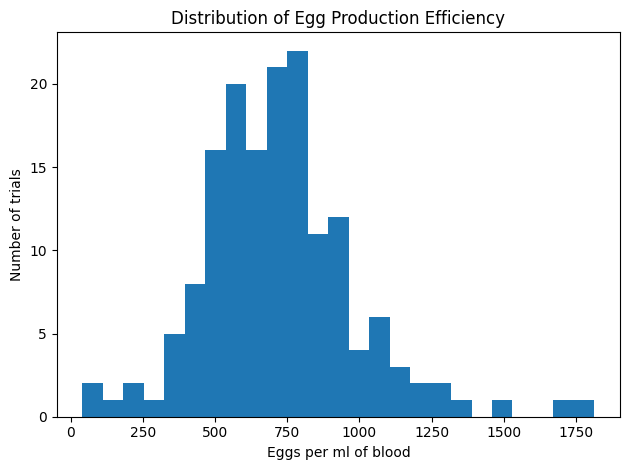

In [33]:
plt.figure()
plt.hist(
    df["efficiency"].dropna(),
    bins=25
)
plt.xlabel("Eggs per ml of blood")
plt.ylabel("Number of trials")
plt.title("Distribution of Egg Production Efficiency")
plt.tight_layout()
plt.show()


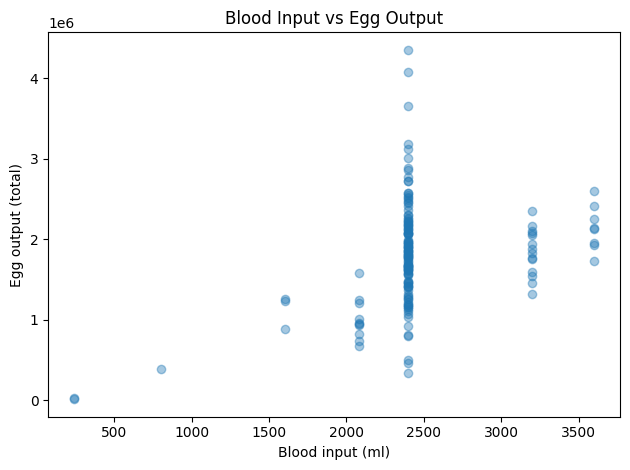

In [34]:
plt.figure()
plt.scatter(
    df["blood_input_ml"],
    df["egg_output_total"],
    alpha=0.4
)
plt.xlabel("Blood input (ml)")
plt.ylabel("Egg output (total)")
plt.title("Blood Input vs Egg Output")
plt.tight_layout()
plt.show()


In [35]:
line_efficiency = (
    df.groupby("line_id", dropna=True)
      .agg(
          avg_efficiency=("efficiency", "mean"),
          n_trials=("efficiency", "count")
      )
      .sort_values("avg_efficiency", ascending=False)
)

line_efficiency


,avg_efficiency,n_trials
line_id,,
TML BRO 16.6.1,1814.583333,1
TML BRO 16.6.2,1697.916667,1
TML BRO 16.6.3,1525.000000,1
TML BRO 16.4.6,1327.083333,1
TML BRO 16.4.5,1300.000000,1
...,...,...
TML AMP 15.3.1,207.916667,1
TML AMP 15.2.2,190.000000,1
TML AMP 15.2.1,137.708333,1


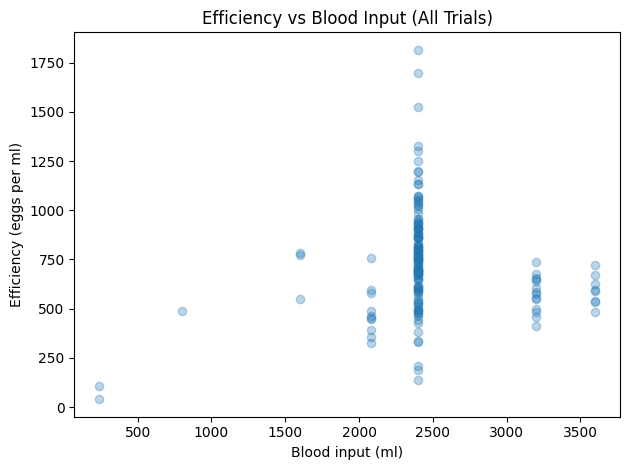

In [36]:
plt.figure()
plt.scatter(
    df["blood_input_ml"],
    df["efficiency"],
    alpha=0.3
)
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency vs Blood Input (All Trials)")
plt.tight_layout()
plt.show()


In [37]:
bucket_size = 500  # ml

bucket_df = (
    df
    .dropna(subset=["blood_input_ml", "efficiency"])
    .assign(
        input_bucket=lambda x: (x["blood_input_ml"] // bucket_size) * bucket_size
    )
    .groupby("input_bucket")
    .agg(
        avg_efficiency=("efficiency", "mean"),
        n_trials=("efficiency", "count")
    )
    .reset_index()
    .sort_values("input_bucket")
)

bucket_df


,input_bucket,avg_efficiency,n_trials
0,0,73.333333,2
1,500,486.250000,1
2,1500,700.625000,3
3,2000,758.418886,130
4,3000,576.696429,14
5,3500,595.520833,8


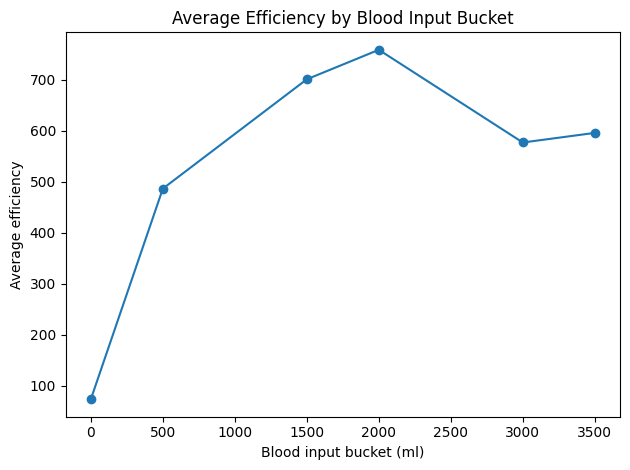

In [38]:
plt.figure()
plt.plot(
    bucket_df["input_bucket"],
    bucket_df["avg_efficiency"],
    marker="o"
)
plt.xlabel("Blood input bucket (ml)")
plt.ylabel("Average efficiency")
plt.title("Average Efficiency by Blood Input Bucket")
plt.tight_layout()
plt.savefig(
    f"{FIGURES_PATH}/avg_efficiency_by_input_bucket.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


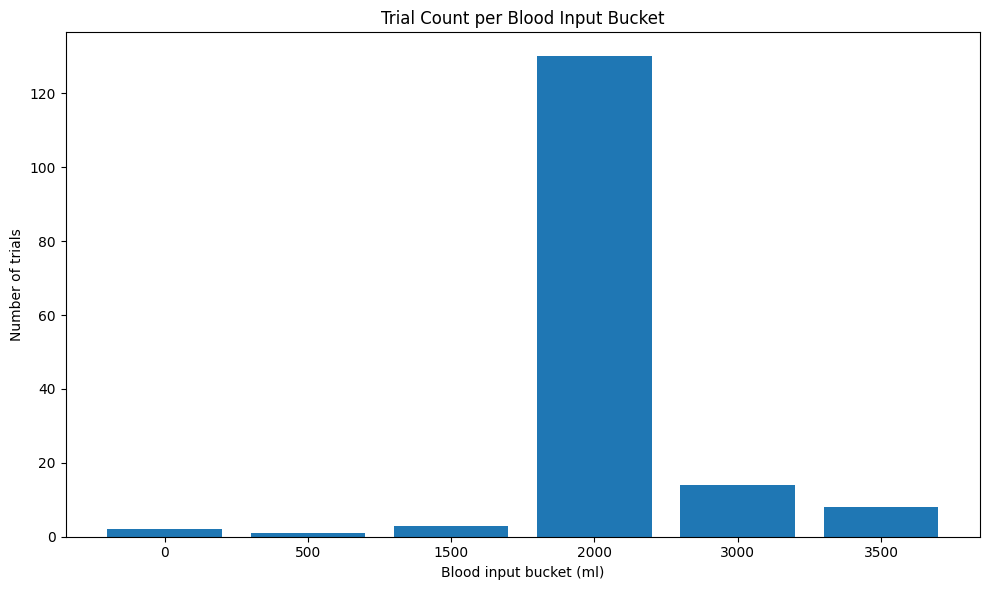

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(
    bucket_df["input_bucket"].astype(str),
    bucket_df["n_trials"]
)
plt.xlabel("Blood input bucket (ml)")
plt.ylabel("Number of trials")
plt.title("Trial Count per Blood Input Bucket")
plt.tight_layout()
plt.show()


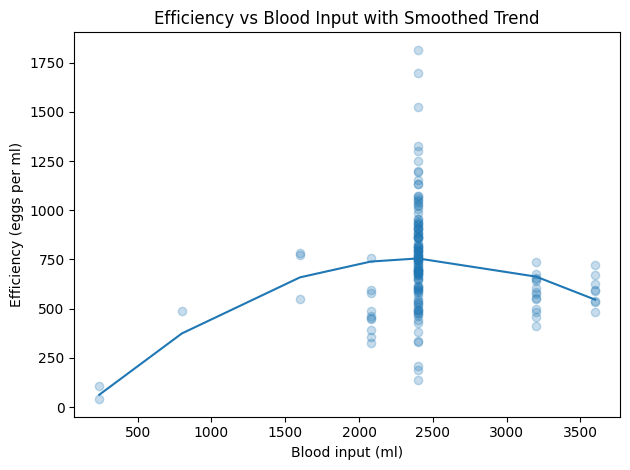

In [40]:
x = df["blood_input_ml"]
y = df["efficiency"]

mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

z = np.polyfit(x, y, deg=2)
p = np.poly1d(z)

x_sorted = np.sort(x)

plt.figure()
plt.scatter(x, y, alpha=0.25)
plt.plot(x_sorted, p(x_sorted))
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency vs Blood Input with Smoothed Trend")
plt.tight_layout()
plt.savefig(
    f"{FIGURES_PATH}/efficiency_vs_input_smoothed_trend.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [41]:
line_summary = (
    df.groupby("line_id")
      .agg(
          mean_efficiency=("efficiency", "mean"),
          std_efficiency=("efficiency", "std"),
          n_trials=("efficiency", "count")
      )
      .assign(
          se_efficiency=lambda x: x["std_efficiency"] / np.sqrt(x["n_trials"])
      )
      .sort_values("mean_efficiency", ascending=False)
)

line_summary


,mean_efficiency,std_efficiency,n_trials,se_efficiency
line_id,,,,
TML BRO 16.6.1,1814.583333,NaN,1,NaN
TML BRO 16.6.2,1697.916667,NaN,1,NaN
TML BRO 16.6.3,1525.000000,NaN,1,NaN
TML BRO 16.4.6,1327.083333,NaN,1,NaN
TML BRO 16.4.5,1300.000000,NaN,1,NaN
...,...,...,...,...
TML AMP 15.3.1,207.916667,NaN,1,NaN
TML AMP 15.2.2,190.000000,NaN,1,NaN
TML AMP 15.2.1,137.708333,NaN,1,NaN


<Figure size 1000x600 with 0 Axes>

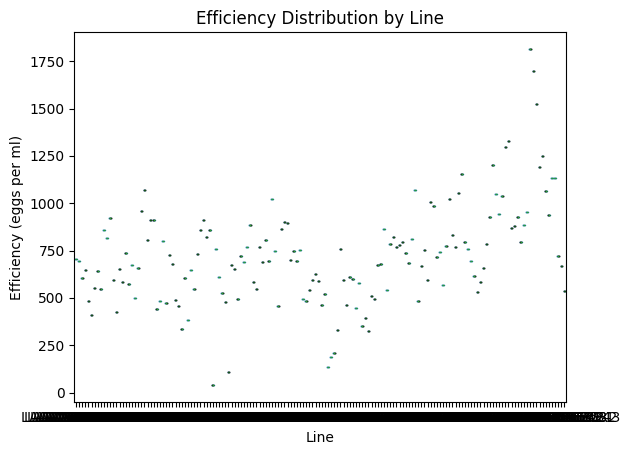

In [42]:
plt.figure(figsize=(10, 6))
df.boxplot(
    column="efficiency",
    by="line_id",
    grid=False
)
plt.xlabel("Line")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency Distribution by Line")
plt.suptitle("")
plt.tight_layout()
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt

line_summary = (
    df.groupby("line_id")
      .agg(
          mean_efficiency=("efficiency", "mean"),
          std_efficiency=("efficiency", "std"),
          n_trials=("efficiency", "count")
      )
      .assign(
          se_efficiency=lambda x: x["std_efficiency"] / np.sqrt(x["n_trials"]),
          ci_lower=lambda x: x["mean_efficiency"] - 1.96 * x["se_efficiency"],
          ci_upper=lambda x: x["mean_efficiency"] + 1.96 * x["se_efficiency"]
      )
      .sort_values("mean_efficiency")
)


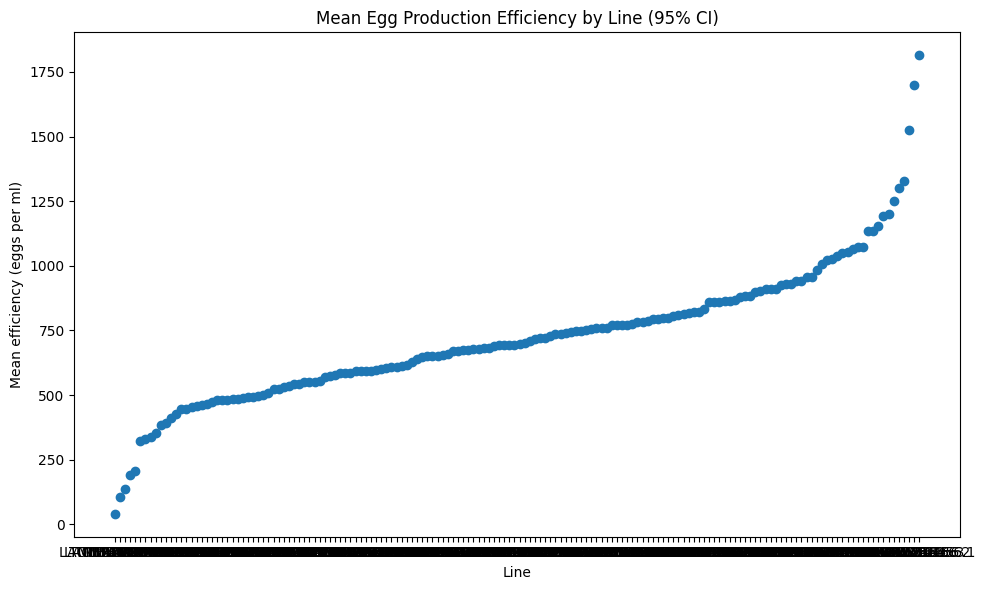

In [44]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=line_summary.index,
    y=line_summary["mean_efficiency"],
    yerr=1.96 * line_summary["se_efficiency"],
    fmt="o",
    capsize=5
)
plt.xlabel("Line")
plt.ylabel("Mean efficiency (eggs per ml)")
plt.title("Mean Egg Production Efficiency by Line (95% CI)")
plt.tight_layout()
plt.show()


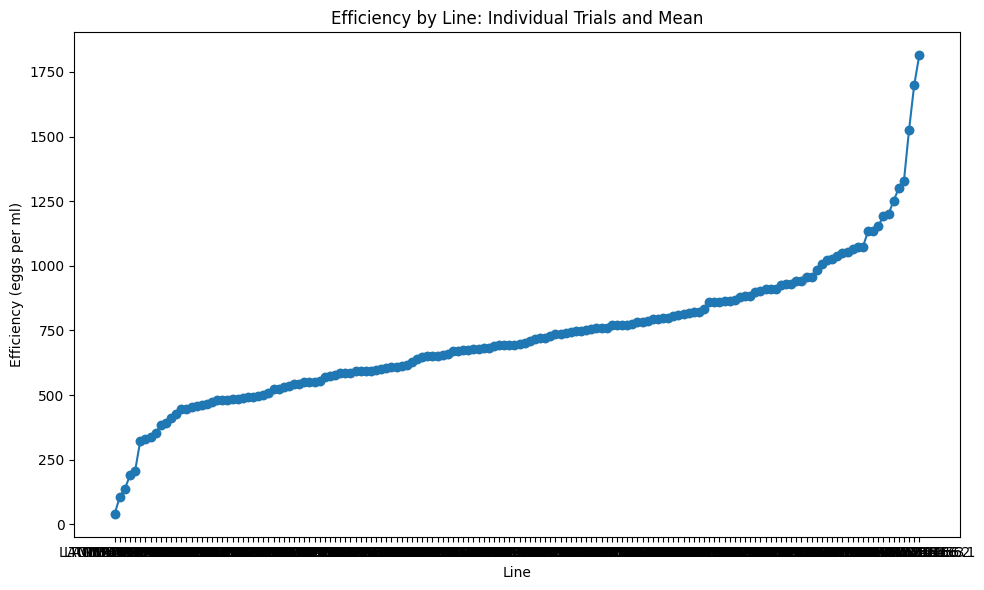

In [45]:
plt.figure(figsize=(10, 6))

for i, line in enumerate(line_summary.index):
    y = df.loc[df["line_id"] == line, "efficiency"]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.4)

plt.plot(
    range(len(line_summary)),
    line_summary["mean_efficiency"],
    marker="o"
)

plt.xticks(range(len(line_summary)), line_summary.index)
plt.xlabel("Line")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency by Line: Individual Trials and Mean")
plt.tight_layout()
plt.show()


In [46]:
df["origin"] = df["line_id"].str.extract(r"(LAO|TML)")
df["treatment"] = df["line_id"].str.extract(r"(BRO|AMP)")


In [47]:
df["line_group"] = df["origin"] + " " + df["treatment"]


In [48]:
df["line_group"].value_counts()


line_group
TML BRO    73
LAO BRO    54
LAO AMP    25
TML AMP     6
Name: count, dtype: int64

In [49]:
group_summary = (
    df.groupby("line_group")
      .agg(
          mean_efficiency=("efficiency", "mean"),
          std_efficiency=("efficiency", "std"),
          n_trials=("efficiency", "count")
      )
      .assign(
          se_efficiency=lambda x: x["std_efficiency"] / np.sqrt(x["n_trials"]),
          ci_lower=lambda x: x["mean_efficiency"] - 1.96 * x["se_efficiency"],
          ci_upper=lambda x: x["mean_efficiency"] + 1.96 * x["se_efficiency"]
      )
      .sort_values("mean_efficiency")
)

group_summary


,mean_efficiency,std_efficiency,n_trials,se_efficiency,ci_lower,ci_upper
line_group,,,,,,
TML AMP,308.368056,157.096508,6,64.134381,182.664669,434.071442
LAO BRO,644.203071,192.748072,54,26.229690,592.792878,695.613264
LAO AMP,681.783333,170.055620,25,34.011124,615.121530,748.445136
TML BRO,828.567205,290.132946,73,33.957493,762.010519,895.123891


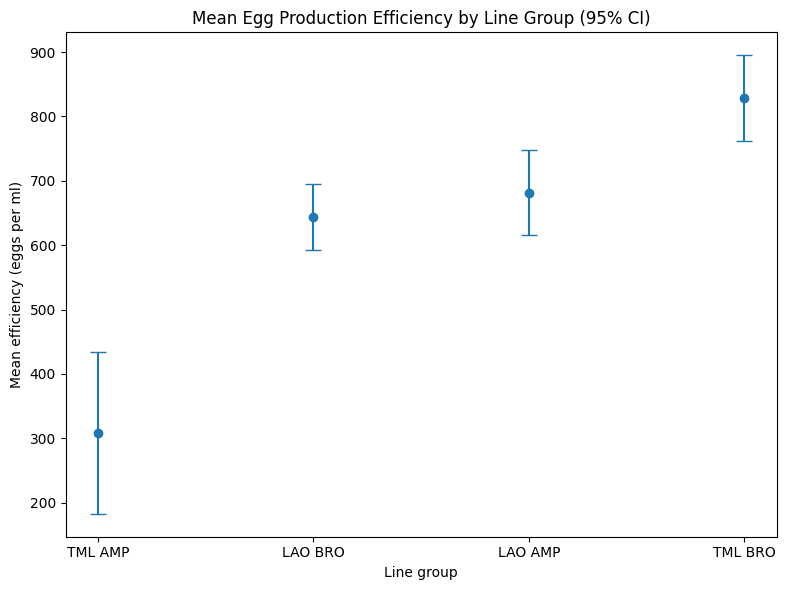

In [50]:
plt.figure(figsize=(8, 6))
plt.errorbar(
    x=group_summary.index,
    y=group_summary["mean_efficiency"],
    yerr=1.96 * group_summary["se_efficiency"],
    fmt="o",
    capsize=6
)

plt.xlabel("Line group")
plt.ylabel("Mean efficiency (eggs per ml)")
plt.title("Mean Egg Production Efficiency by Line Group (95% CI)")
plt.tight_layout()
plt.show()


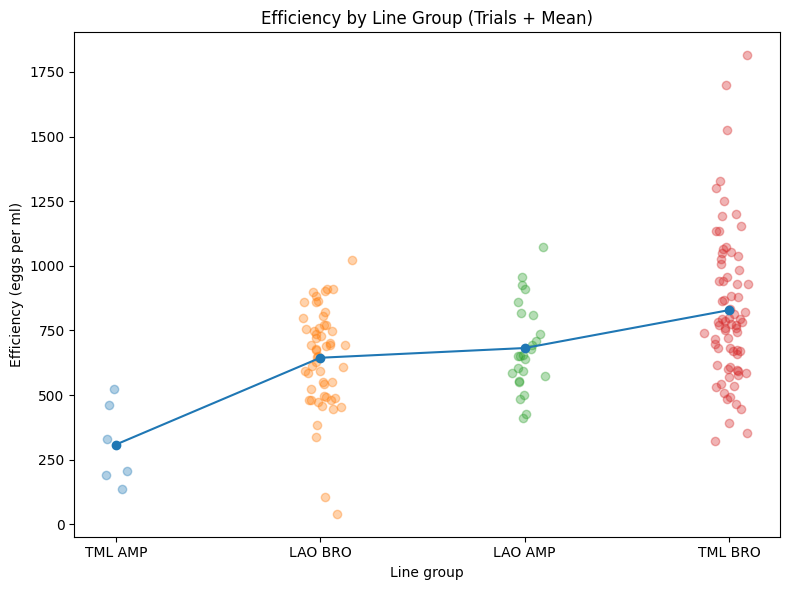

In [51]:
plt.figure(figsize=(8, 6))

order = group_summary.index.tolist()

for i, group in enumerate(order):
    y = df.loc[df["line_group"] == group, "efficiency"]
    x = np.random.normal(i, 0.05, size=len(y))
    plt.scatter(x, y, alpha=0.35)

plt.plot(
    range(len(order)),
    group_summary["mean_efficiency"],
    marker="o"
)

plt.xticks(range(len(order)), order)
plt.xlabel("Line group")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency by Line Group (Trials + Mean)")
plt.tight_layout()
plt.show()


In [52]:
import statsmodels.formula.api as smf

model = smf.ols(
    "efficiency ~ C(origin) * C(treatment) + blood_input_ml",
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             efficiency   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.23
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           2.28e-07
Time:                        13:20:14   Log-Likelihood:                -1086.9
No. Observations:                 158   AIC:                             2184.
Df Residuals:                     153   BIC:                             2199.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [53]:
import statsmodels.formula.api as smf

model = smf.ols(
    formula="efficiency ~ C(line_id) + blood_input_ml",
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             efficiency   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Dec 2025   Prob (F-statistic):                nan
Time:                        13:20:14   Log-Likelihood:                 2989.9
No. Observations:                 158   AIC:                            -5664.
Df Residuals:                       0   BIC:                            -5180.
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df["efficiency"],
    groups=df["line_id"],
    alpha=0.05
)

print(tukey)


/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2      meandiff  p-adj lower upper reject
-------------------------------------------------------------------
 LAO AMP 20.1.1  LAO AMP 20.1.2   -11.6667   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 20.2.1  -101.1458   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 20.2.2   -57.0833   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.1.1  -224.2708   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.1.2  -296.4583   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.2.1  -153.9583   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.2.2   -65.8333   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.2.3  -157.7083   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.3.1   153.3333   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.3.2   109.5833   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.3.3   217.9167   nan   nan   nan  False
 LAO AMP 20.1.1  LAO AMP 21.4.1  -114.1667   nan

In [55]:
import statsmodels.api as sm

mixed_model = smf.mixedlm(
    "efficiency ~ C(line_id) + blood_input_ml",
    data=df,
    groups=df["line_id"]  # or date, trial_id, etc.
).fit()

print(mixed_model.summary())


/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1561: RuntimeWarning: invalid value encountered in log
  np.log(self.n_totobs - self.k_fe) / 2.)
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1561: RuntimeWarning: invalid value encountered in log
  np.log(self.n_totobs - self.k_fe) / 2.)
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     efficiency
No. Observations:       158         Method:                 REML      
No. Groups:             158         Scale:                  -0.0000   
Min. group size:        1           Log-Likelihood:         nan       
Max. group size:        1           Converged:              Yes       
Mean group size:        1.0                                           
----------------------------------------------------------------------
                                Coef.   Std.Err. z P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                      1488.174                               
C(line_id)[T.LAO AMP 20.1.2]    -11.667                               
C(line_id)[T.LAO AMP 20.2.1]    159.218                               
C(line_id)[T.LAO AMP 20.2.2]    203.280                               
C(line_id)[T.LAO AMP 21

In [56]:
line_summary.assign(
    relative_diff=lambda x: (
        x["mean_efficiency"] / x["mean_efficiency"].mean() - 1
    )
)


,mean_efficiency,std_efficiency,n_trials,se_efficiency,ci_lower,ci_upper,relative_diff
line_id,,,,,,,
LAO BRO 20.4.9,40.416667,NaN,1,NaN,NaN,NaN,-0.944066
LAO BRO 20.5.5,106.250000,NaN,1,NaN,NaN,NaN,-0.852957
TML AMP 15.2.1,137.708333,NaN,1,NaN,NaN,NaN,-0.809421
TML AMP 15.2.2,190.000000,NaN,1,NaN,NaN,NaN,-0.737052
TML AMP 15.3.1,207.916667,NaN,1,NaN,NaN,NaN,-0.712257
...,...,...,...,...,...,...,...
TML BRO 16.4.5,1300.000000,NaN,1,NaN,NaN,NaN,0.799116
TML BRO 16.4.6,1327.083333,NaN,1,NaN,NaN,NaN,0.836598
TML BRO 16.6.3,1525.000000,NaN,1,NaN,NaN,NaN,1.110502
